# View Count Prediction - Grouping Videos by Meta Tags


## Objective

This experiment aims to check that the linear model is valid on groups of related videos. Furthermore, we'll evaluate if the linear coefficients vary from one group to the other.

## Description

On this notebook we group the videos by two criterias:
- platform (either Facebook or YouTube)
- meta tag (currently only video length is available)

Linear regression is applied to every group of videos.
The coefficients obtained on the regression each group are shown.

## Group Videos By Platform and Length

Coefficients of the linear regression per group
╒══════════════════╤═════════════╤════════╕
│ group            │   intercept │   rate │
╞══════════════════╪═════════════╪════════╡
│ facebook-0-2min  │       -0.11 │   1.08 │
├──────────────────┼─────────────┼────────┤
│ facebook-3-5min  │        0.01 │   1.05 │
├──────────────────┼─────────────┼────────┤
│ facebook-6-15min │       -0.22 │   1.12 │
├──────────────────┼─────────────┼────────┤
│ youtube-0-2min   │        0.06 │   1.05 │
├──────────────────┼─────────────┼────────┤
│ youtube-16-44min │        0.08 │   1.04 │
├──────────────────┼─────────────┼────────┤
│ youtube-3-5min   │        0.27 │   0.96 │
├──────────────────┼─────────────┼────────┤
│ youtube-45+min   │        0.31 │   0.94 │
├──────────────────┼─────────────┼────────┤
│ youtube-6-15min  │        0.36 │   0.92 │
╘══════════════════╧═════════════╧════════╛


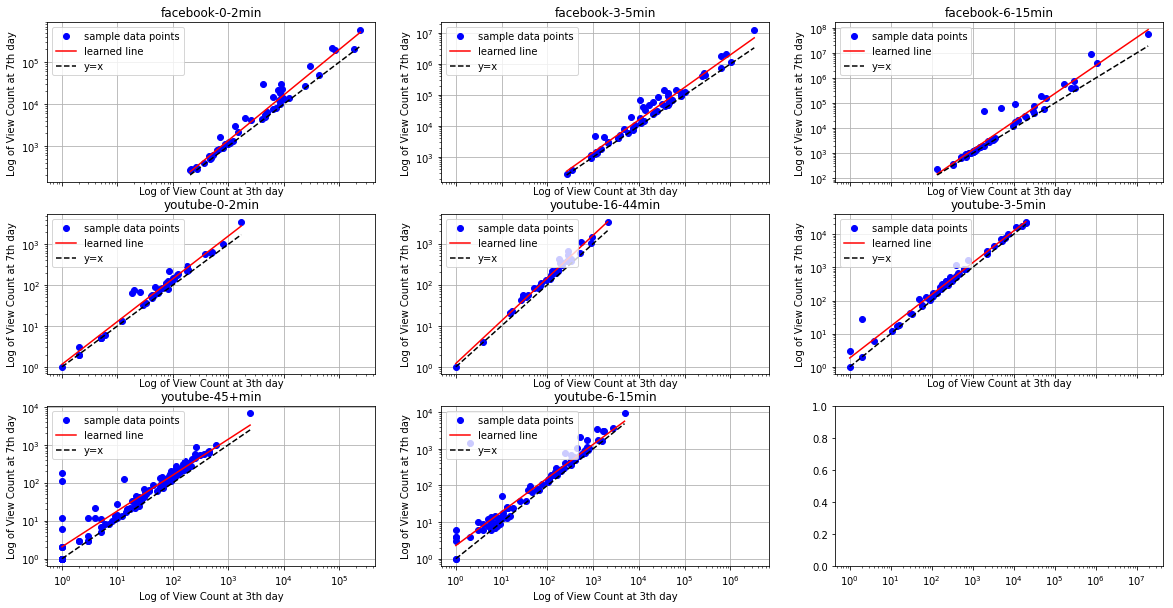

In [11]:
# %load tag_and_platform.py
from data_sources.linear_log_popularity_data_source import MetaTagAwareEarlyToLatePopularityDataSource
import experiment

experiment.run(MetaTagAwareEarlyToLatePopularityDataSource)

## Group Videos By Length Only

Coefficients of the linear regression per group
╒══════════╤═════════════╤════════╕
│ group    │   intercept │   rate │
╞══════════╪═════════════╪════════╡
│ 0-2min   │        0.06 │   1.04 │
├──────────┼─────────────┼────────┤
│ 16-44min │        0.06 │   1.05 │
├──────────┼─────────────┼────────┤
│ 3-5min   │        0.16 │   1.01 │
├──────────┼─────────────┼────────┤
│ 45+min   │        0.32 │   0.94 │
├──────────┼─────────────┼────────┤
│ 6-15min  │        0.22 │   1    │
╘══════════╧═════════════╧════════╛


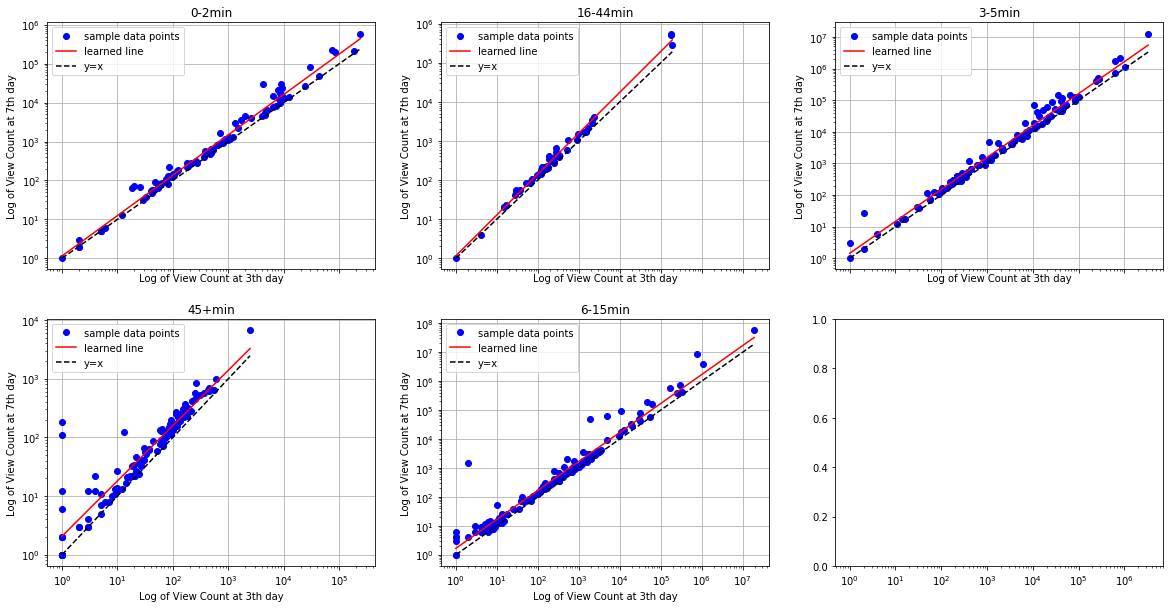

In [13]:
# %load tags_only.py
from data_sources.linear_log_popularity_data_source import MetaTagExclusiveEarlyToLatePopularityDataSource
import experiment

experiment.run(MetaTagExclusiveEarlyToLatePopularityDataSource)


## Conclusion

The linear behavior was visually observed on the plots of all grouping criteria tried. Furthermore, the linear regression on each video group produced notably different coefficients, specially on the intercept parameter. This result suggests that models trained on groups of related videos shall perform better than models trained on the entire data set.